INSTALLS AND IMPORTS

In [ ]:
!pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
"""from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense"""

'from tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense'

DATA LOADING AND PREPROCESSING

In [ ]:

# Load the dataset
file_path = '/content/predigree1.csv'
data = pd.read_csv(file_path)

In [ ]:
print("Dimensions of the dataset:", data.shape)

Dimensions of the dataset: (129, 17)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Type             129 non-null    object
 1   Genetic_disease  129 non-null    object
 2   Gene             129 non-null    object
 3   Variation        129 non-null    object
 4   Consanguinity    129 non-null    object
 5   Mother_affected  129 non-null    object
 6   Mother_Carrier   129 non-null    object
 7   Father_affected  129 non-null    object
 8   Father_Carrier   129 non-null    object
 9   1st_level        129 non-null    object
 10  2nd_level        129 non-null    object
 11  G1               129 non-null    object
 12  G2               129 non-null    object
 13  G3               129 non-null    object
 14  G4               129 non-null    object
 15  G5               129 non-null    object
 16  Risk             129 non-null    object
dtypes: object(17)
memory usage: 17.3+ K

In [ ]:
nan_counts_per_column = data.isna().sum()
print(nan_counts_per_column)
# Handle missing values if any
#data = data.fillna('N/A')

Type               0
Genetic_disease    0
Gene               0
Variation          0
Consanguinity      0
Mother_affected    0
Mother_Carrier     0
Father_affected    0
Father_Carrier     0
1st_level          0
2nd_level          0
G1                 0
G2                 0
G3                 0
G4                 0
G5                 0
Risk               0
dtype: int64


In [ ]:
data

,Type,Genetic_disease,Gene,Variation,Consanguinity,Mother_affected,Mother_Carrier,Father_affected,Father_Carrier,1st_level,2nd_level,G1,G2,G3,G4,G5,Risk
0,Autosomal Recessive,Beta-thalassemia,Hbb,Homozygous,Yes,No,Yes,No,Yes,No,No,Yes,MTP,NIL,NIL,NIL,25%
1,Autosomal Recessive,Beta-thalassemia,Hbb,Homozygous,Yes,No,Yes,No,Yes,No,No,Yes,No,NIL,NIL,NIL,25%
2,Autosomal Recessive,Beta-thalassemia,Hbb,Homozygous,Yes,No,Yes,No,Yes,No,No,Yes,No,NIL,NIL,NIL,25%
3,Autosomal Recessive,Beta-thalassemia,Hbb,Homozygous,Yes,No,Yes,No,Yes,No,No,Yes,NIL,NIL,NIL,NIL,25%
4,Autosomal Recessive,Beta-thalassemia,Hbb,Homozygous,Yes,No,Yes,No,Yes,Yes,No,Yes,NIL,NIL,NIL,NIL,25%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Autosomal Recessive,Cystic fibrosis,CFTR,Homozygous,Yes,No,Yes,No,Yes,No,No,No,MTP,NIL,NIL,NIL,25%
125,Autosomal Recessive,Cystic fibrosis,CFTR,Compound Heterozygous,No,No,Yes,No,Yes,No,No,Yes,NIL,NIL,NIL,NIL,25%
126,Autosomal Recessive,Cystic fibrosis,CFTR,Compound Heterozygous,No,No,Yes,No,Yes,No,No,Yes,NIL,NIL,NIL,NIL,25%
127,Autosomal Recessive,Intellectual developmental disorder with abNor...,PUS7,Homozygous,No,No,Yes,No,Yes,No,No,Yes,Yes,NIL,NIL,NIL,25%


In [ ]:
print("\nSummary statistics for numerical columns:")
print(data.describe())


Summary statistics for numerical columns:
                       Type              Genetic_disease Gene   Variation  \
count                   129                          129  129         129   
unique                    3                           47   39           4   
top     Autosomal Recessive  Duchenne muscular dystrophy  Hbb  Homozygous   
freq                     91                           20   35          62   

       Consanguinity Mother_affected Mother_Carrier Father_affected  \
count            129             129            129             129   
unique             2               2              3               2   
top               No              No            Yes              No   
freq              89             117            106             114   

       Father_Carrier 1st_level 2nd_level   G1   G2   G3   G4   G5 Risk  
count             129       129       129  129  129  129  129  129  129  
unique              2         2         2    5    5    5    3    2 

In [ ]:
print("\nValue counts for categorical columns:")
for col in data.select_dtypes(include=['object']):
    print(f"\n{col}:")
    print(data[col].value_counts())


Value counts for categorical columns:

Type:
Type
Autosomal Recessive    91
X-linked Recessive     21
Autosomal Dominant     17
Name: count, dtype: int64

Genetic_disease:
Genetic_disease
Duchenne muscular dystrophy                                   20
Beta-thalassemia                                              15
Beta thalassemia                                              10
Wilson disease                                                10
Sickle cell anemia                                             5
Spinal Muscular Atrophy                                        5
Delta Beta-thalassemia                                         5
Sickle cell Anemia                                             4
Mucopolysaccharidosis Type 4                                   4
Cystic fibrosis                                                4
Dystrophic epidermolysis bullosa (DEB)                         3
Mucopolysaccharidosis Type 1                                   3
Niemann-Pick                   

In [ ]:
label_encoder = LabelEncoder()
categorical_columns = ['Type', 'Genetic_disease', 'Gene', 'Variation', 'Consanguinity', "Mother_affected",	"Mother_Carrier",	"Father_affected", "Father_Carrier",
                        '1st_level', '2nd_level', 'G1', 'G2', 'G3', 'G4', 'G5']

for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [ ]:
# Convert 'Risk' column to numerical format
#data['Risk'] = data['Risk'].str.rstrip('%').astype('float') / 100.0

# Define the bin edges and labels
# 1= 4% , 2=25%, 3=50%
bin_edges = [0, 0.05, 0.3, 0.6]
bin_labels = [1, 2, 3]

# Convert 'Risk' column to bins
data['Risk_Bin'] = pd.cut(data['Risk'].str.rstrip('%').astype('float') / 100, bins=bin_edges, labels=bin_labels)
data['Risk'] = data['Risk'].str.replace('%', '')
data['Risk'] = pd.to_numeric(data['Risk'])
#data['Risk_Bin_Int'] = pd.to_numeric(data['Risk_Bin'])

In [ ]:
print("\nData types of columns:")
print(data.dtypes)


Data types of columns:
Type                  int64
Genetic_disease       int64
Gene                  int64
Variation             int64
Consanguinity         int64
Mother_affected       int64
Mother_Carrier        int64
Father_affected       int64
Father_Carrier        int64
1st_level             int64
2nd_level             int64
G1                    int64
G2                    int64
G3                    int64
G4                    int64
G5                    int64
Risk                  int64
Risk_Bin           category
dtype: object


In [ ]:
data

,Type,Genetic_disease,Gene,Variation,Consanguinity,Mother_affected,Mother_Carrier,Father_affected,Father_Carrier,1st_level,2nd_level,G1,G2,G3,G4,G5,Risk,Risk_Bin
0,1,3,16,3,1,0,2,0,1,0,0,4,1,2,1,0,25,2
1,1,3,16,3,1,0,2,0,1,0,0,4,3,2,1,0,25,2
2,1,3,16,3,1,0,2,0,1,0,0,4,3,2,1,0,25,2
3,1,3,16,3,1,0,2,0,1,0,0,4,2,2,1,0,25,2
4,1,3,16,3,1,0,2,0,1,1,0,4,2,2,1,0,25,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,1,8,3,3,1,0,2,0,1,0,0,3,1,2,1,0,25,2
125,1,8,3,0,0,0,2,0,1,0,0,4,2,2,1,0,25,2
126,1,8,3,0,0,0,2,0,1,0,0,4,2,2,1,0,25,2
127,1,21,31,3,0,0,2,0,1,0,0,4,4,2,1,0,25,2


EXPLORATORY DATA ANALYSIS

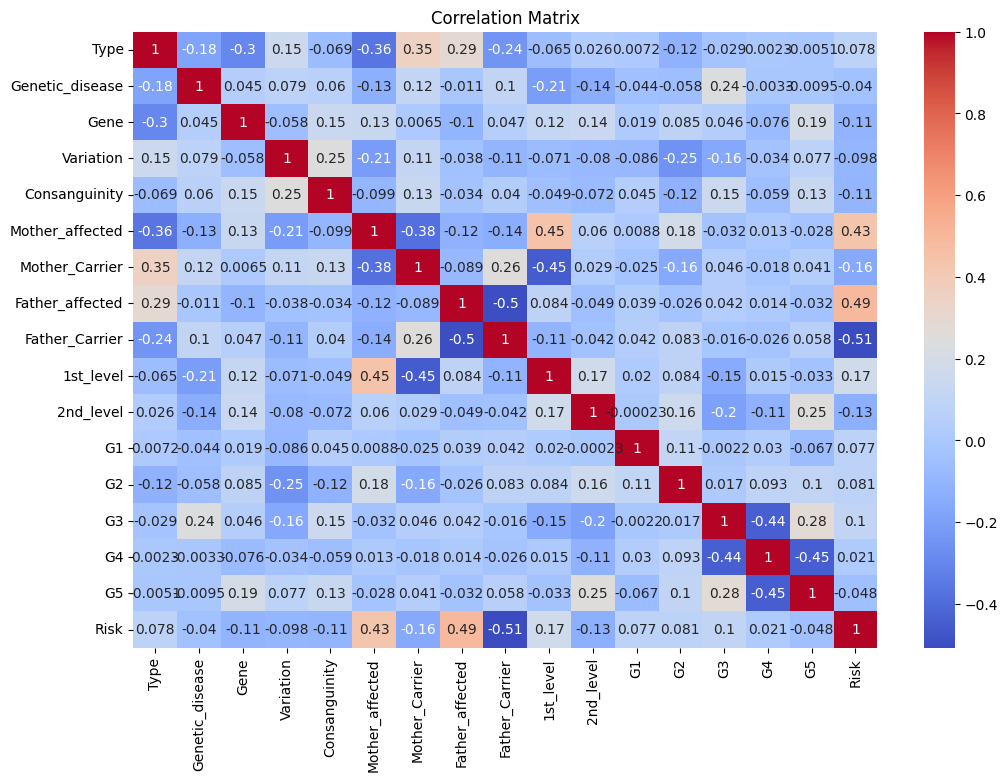

In [ ]:
# Check if there are any numerical columns
numerical_cols = data.select_dtypes(include=['number']).columns

if len(numerical_cols) > 0:
    # Calculate correlation matrix
    corr_matrix = data[numerical_cols].corr()

    # Visualize correlation matrix as a heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("No numerical columns found in the dataset.")

<Figure size 3000x3000 with 0 Axes>

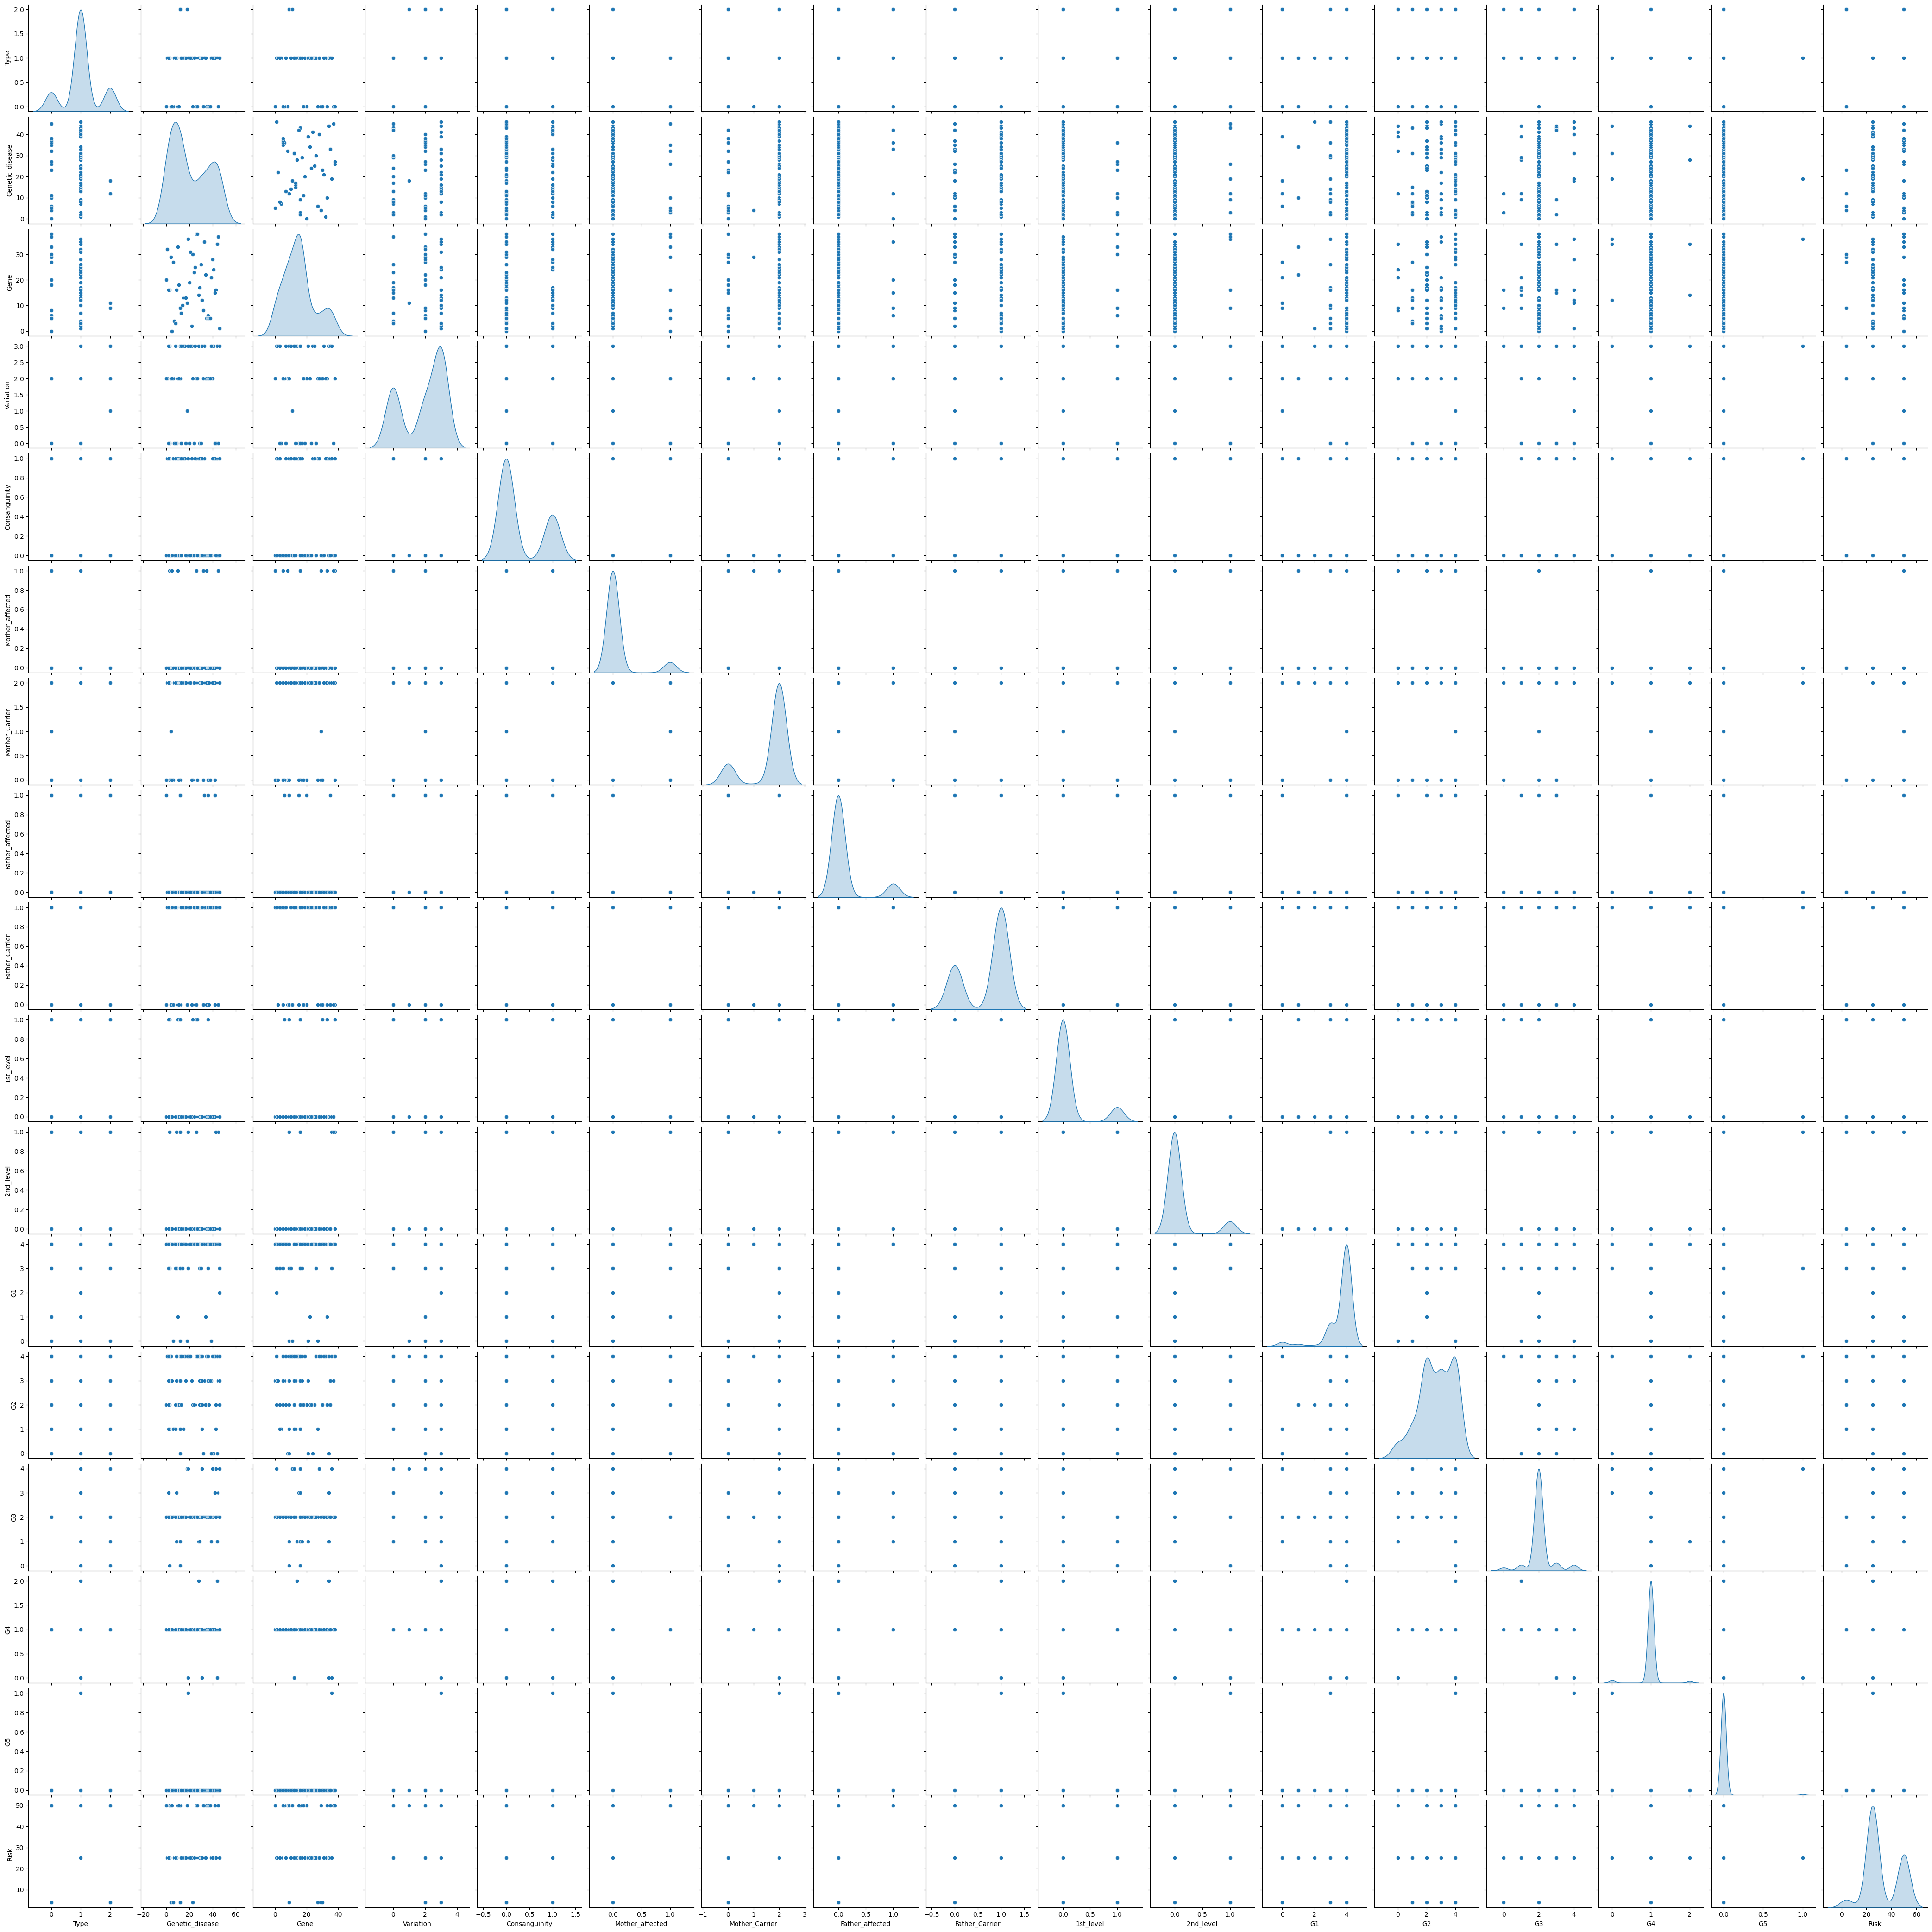

In [ ]:
#plt.figure(figsize=(30, 30))
#sns.pairplot(data.select_dtypes(include=['number']), diag_kind='kde')
#plt.show()

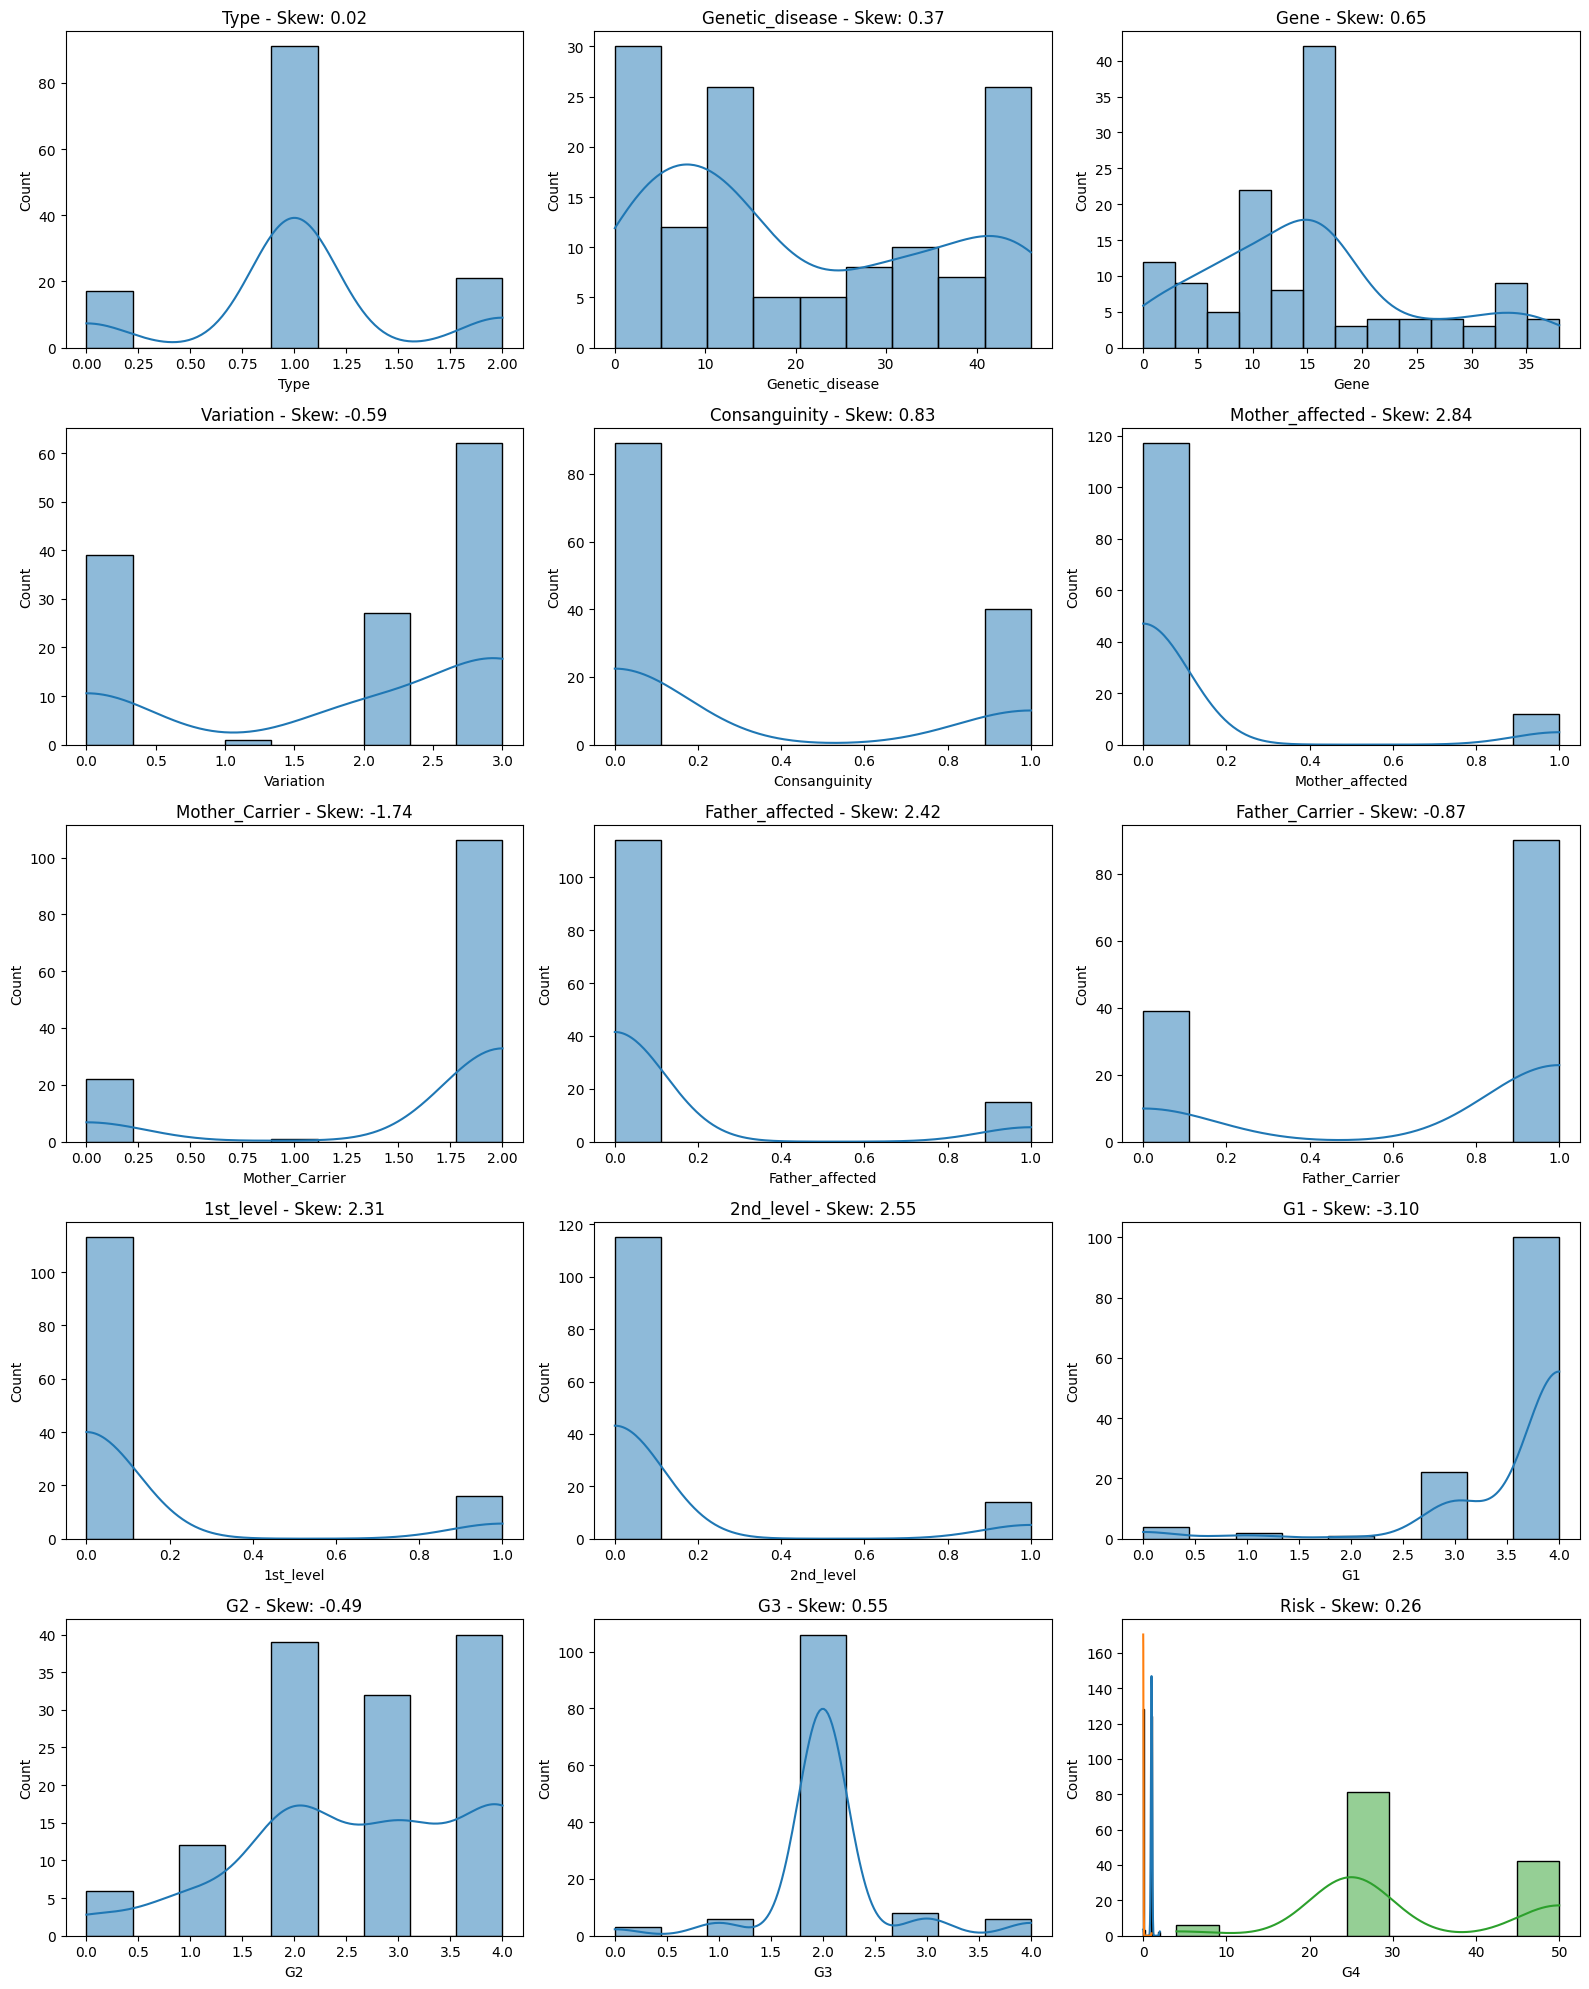

In [ ]:
numerical_cols = data.select_dtypes(include=['number']).columns
plt.figure(figsize=(16, 20))
for i, col in enumerate(numerical_cols, start=1):
    plt.subplot(5, 3, i) if i <= 15 else None
    sns.histplot(data[col], kde=True)
    plt.title(f"{col} - Skew: {data[col].skew():.2f}")
plt.tight_layout()
plt.show()


DATA TRAIN TEST SPLIT

In [ ]:

data = data.drop('Risk', axis=1)
data.head(5)

,Type,Genetic_disease,Gene,Variation,Consanguinity,Mother_affected,Mother_Carrier,Father_affected,Father_Carrier,1st_level,2nd_level,G1,G2,G3,G4,G5,Risk_Bin
0,1,3,16,3,1,0,2,0,1,0,0,4,1,2,1,0,2
1,1,3,16,3,1,0,2,0,1,0,0,4,3,2,1,0,2
2,1,3,16,3,1,0,2,0,1,0,0,4,3,2,1,0,2
3,1,3,16,3,1,0,2,0,1,0,0,4,2,2,1,0,2
4,1,3,16,3,1,0,2,0,1,1,0,4,2,2,1,0,2


In [ ]:
# Split the data into features and target variable
X = data.drop('Risk_Bin', axis=1)
y = data['Risk_Bin']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

FEATURE IMPORTANCE WITH REGRESSOR

Selected features:
Index(['Type', 'Genetic_disease', 'Gene', 'Mother_affected', 'Mother_Carrier',
       'Father_affected', 'Father_Carrier', '1st_level'],
      dtype='object')


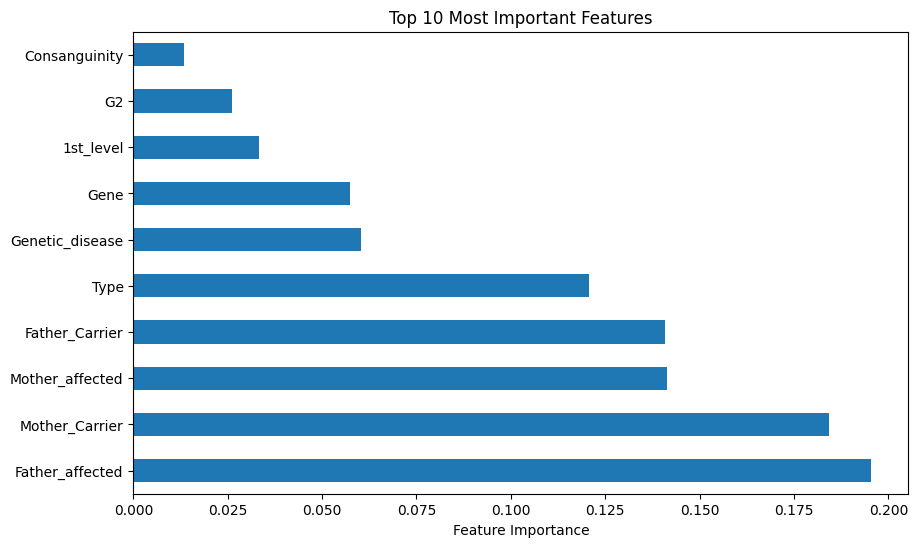

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Select important features using SelectFromModel
sfm = SelectFromModel(rf, threshold='median')
sfm.fit(X_train, y_train)
selected_features = X_train.columns[sfm.get_support()]

# Print selected features
print("Selected features:")
print(selected_features)

# Visualize feature importances
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Most Important Features')
plt.xlabel('Feature Importance')
plt.show()

REGRESSOR MODEL RESULTS - WITHOUT DATA AUGMENTATION

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_mae = mean_absolute_error(y_test, linear_predictions)
print("Linear Regression Mean Squared Error:", linear_mse)
print("Linear Regression Mean Absolute Error:", linear_mae)



Linear Regression Mean Squared Error: 0.10697276269862138
Linear Regression Mean Absolute Error: 0.238171712806202


In [ ]:

# Random Forest Regressor model
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)
rf_predictions = random_forest_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
print("Random Forest Regressor Mean Squared Error:", rf_mse)
print("Random Forest Regressor Mean Absolute Error:", rf_mae)

Random Forest Regressor Mean Squared Error: 0.015384615384615377
Random Forest Regressor Mean Absolute Error: 0.05076923076923074


In [ ]:
# Support Vector Machines (SVM)
svm_model = SVR()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_mae = mean_absolute_error(y_test, svm_predictions)
print("SVM Mean Squared Error:", svm_mse)
print("SVM Mean Absolute Error:", svm_mae)

SVM Mean Squared Error: 0.24642153947784393
SVM Mean Absolute Error: 0.39800600968024347


In [ ]:

# XGBoost
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
print("XGBoost Mean Squared Error:", xgb_mse)
print("XGBoost Mean Absolute Error:", xgb_mae)

XGBoost Mean Squared Error: 0.01312763841813008
XGBoost Mean Absolute Error: 0.033654712713681735


In [ ]:

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_mae = mean_absolute_error(y_test, knn_predictions)
print("K-Nearest Neighbors Mean Squared Error:", knn_mse)
print("K-Nearest Neighbors Mean Absolute Error:", knn_mae)



K-Nearest Neighbors Mean Squared Error: 0.09384615384615384
K-Nearest Neighbors Mean Absolute Error: 0.19230769230769235


In [ ]:
# Decision Trees
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_mae = mean_absolute_error(y_test, dt_predictions)
print("Decision Trees Mean Squared Error:", dt_mse)
print("Decision Trees Mean Absolute Error:", dt_mae)

Decision Trees Mean Squared Error: 0.038461538461538464
Decision Trees Mean Absolute Error: 0.038461538461538464


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import hamming_loss, precision_score, recall_score, f1_score, multilabel_confusion_matrix



FEATURE IMPORTANCE - CLASSIFIER

Selected features:
Index(['Type', 'Genetic_disease', 'Gene', 'Mother_affected', 'Mother_Carrier',
       'Father_affected', 'Father_Carrier', '1st_level'],
      dtype='object')


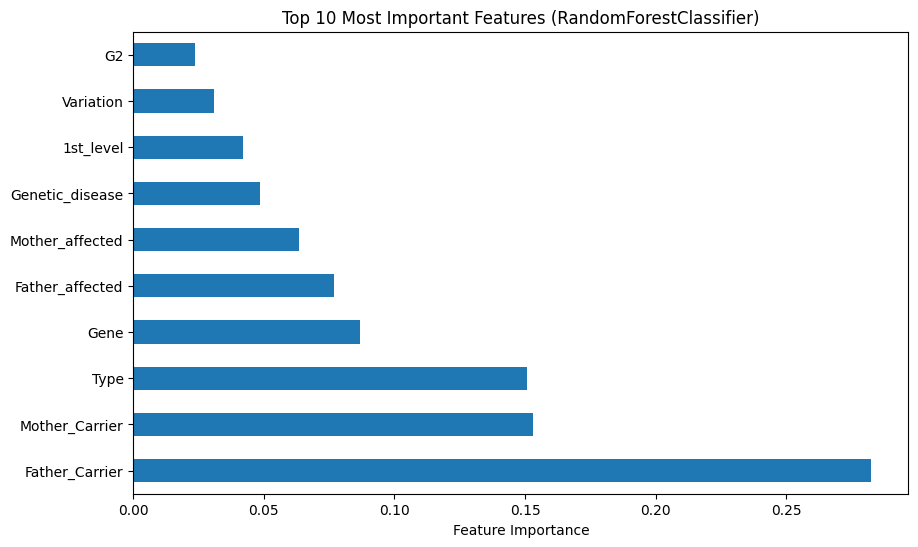

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_clf.fit(X_train, y_train)

# Select important features using SelectFromModel
sfm = SelectFromModel(rf_clf, threshold='median')
sfm.fit(X_train, y_train)
selected_features = X_train.columns[sfm.get_support()]

# Print selected features
print("Selected features:")
print(selected_features)

# Visualize feature importances
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(rf_clf.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Most Important Features (RandomForestClassifier)')
plt.xlabel('Feature Importance')
plt.show()

Selected features:
Index(['Type', 'Variation', 'Consanguinity', 'Mother_affected',
       'Mother_Carrier', 'Father_affected', 'Father_Carrier', '1st_level'],
      dtype='object')


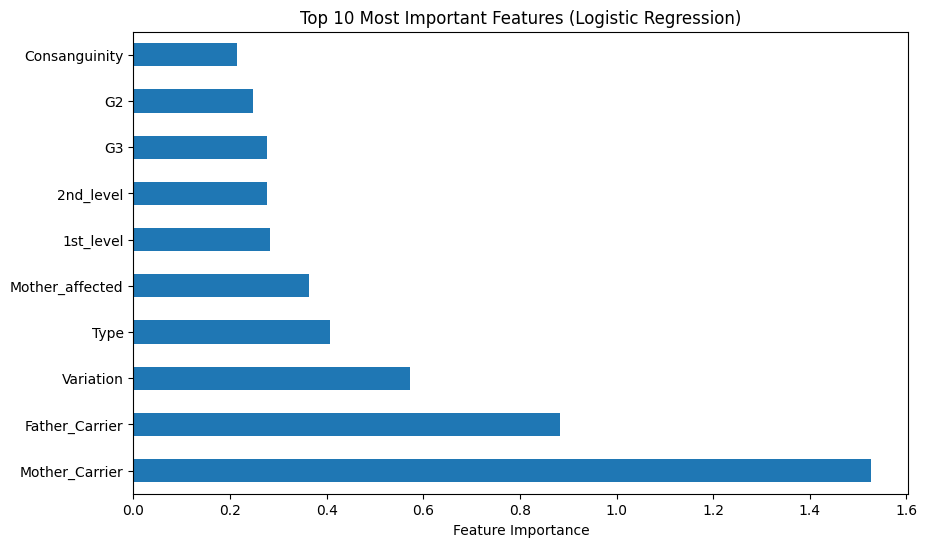

In [ ]:
logistic_clf = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model on the training data
logistic_clf.fit(X_train, y_train)

# Select important features using SelectFromModel
sfm = SelectFromModel(logistic_clf, threshold='median')
sfm.fit(X_train, y_train)
selected_features = X_train.columns[sfm.get_support()]

# Print selected features
print("Selected features:")
print(selected_features)

# Visualize feature importances
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(abs(logistic_clf.coef_[0]), index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Most Important Features (Logistic Regression)')
plt.xlabel('Feature Importance')
plt.show()

CLASSIFIER MODEL RESULTS - WITHOUT DATA AUGMENTATION

In [ ]:
def evaluate_multilabel_model(predictions, y_true):
    # Hamming Loss
    hamming_loss_value = hamming_loss(y_true, predictions)
    print("Hamming Loss:", hamming_loss_value)

    # Precision, Recall, F1 Score per Label
    precision_per_label = precision_score(y_true, predictions, average=None)
    recall_per_label = recall_score(y_true, predictions, average=None)
    f1_per_label = f1_score(y_true, predictions, average=None)

    # Print Precision, Recall, and F1 Score per Label
    for i in range(len(precision_per_label)):
        print(f"Label {i + 1} - Precision: {precision_per_label[i]}, Recall: {recall_per_label[i]}, F1 Score: {f1_per_label[i]}")

    # F1 Score (Micro, Macro, Weighted)
    f1_micro = f1_score(y_true, predictions, average='micro')
    f1_macro = f1_score(y_true, predictions, average='macro')
    f1_weighted = f1_score(y_true, predictions, average='weighted')

    print("\nMicro F1 Score:", f1_micro)
    print("Macro F1 Score:", f1_macro)
    print("Weighted F1 Score:", f1_weighted)

In [ ]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print("Logistic Regression Accuracy:", logistic_accuracy)
print("Logistic Regression Classification Report:\n", classification_report(y_test, logistic_predictions))
evaluate_multilabel_model(logistic_predictions, y_test)


"""
conf_matrix = confusion_matrix(y_test, logistic_predictions)

# Create a heatmap using Seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix - Ensemble Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()"""

Logistic Regression Accuracy: 0.9615384615384616
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           2       0.94      1.00      0.97        16
           3       1.00      0.90      0.95        10

    accuracy                           0.96        26
   macro avg       0.97      0.95      0.96        26
weighted avg       0.96      0.96      0.96        26

Hamming Loss: 0.038461538461538464
Label 1 - Precision: 0.9411764705882353, Recall: 1.0, F1 Score: 0.9696969696969697
Label 2 - Precision: 1.0, Recall: 0.9, F1 Score: 0.9473684210526316

Micro F1 Score: 0.9615384615384616
Macro F1 Score: 0.9585326953748007
Weighted F1 Score: 0.9611090663722243


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


"\nconf_matrix = confusion_matrix(y_test, logistic_predictions)\n\n# Create a heatmap using Seaborn\nsns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,\n            xticklabels=['Predicted 0', 'Predicted 1'],\n            yticklabels=['Actual 0', 'Actual 1'])\n\nplt.title('Confusion Matrix - Ensemble Model')\nplt.xlabel('Predicted')\nplt.ylabel('Actual')\nplt.show()"

In [ ]:

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("\nRandom Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))
evaluate_multilabel_model(rf_predictions, y_test)



Random Forest Accuracy: 1.0
Random Forest Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        10

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26

Hamming Loss: 0.0
Label 1 - Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Label 2 - Precision: 1.0, Recall: 1.0, F1 Score: 1.0

Micro F1 Score: 1.0
Macro F1 Score: 1.0
Weighted F1 Score: 1.0


In [ ]:
# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform y to encoded labels
y_encoded = label_encoder.fit_transform(y_train)
y_encoded

array([1, 1, 0, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 1, 0, 1,
       1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1])

In [ ]:
# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_encoded)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("\nXGBoost Accuracy:", xgb_accuracy)
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_predictions))
evaluate_multilabel_model(xgb_predictions, y_test)



XGBoost Accuracy: 0.0
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00      16.0
           3       0.00      0.00      0.00      10.0

    accuracy                           0.00      26.0
   macro avg       0.00      0.00      0.00      26.0
weighted avg       0.00      0.00      0.00      26.0

Hamming Loss: 1.0
Label 1 - Precision: 0.0, Recall: 0.0, F1 Score: 0.0
Label 2 - Precision: 0.0, Recall: 0.0, F1 Score: 0.0
Label 3 - Precision: 0.0, Recall: 0.0, F1 Score: 0.0
Label 4 - Precision: 0.0, Recall: 0.0, F1 Score: 0.0

Micro F1 Score: 0.0
Macro F1 Score: 0.0
Weighted F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
# Ensemble Learning with Voting Classifier
ensemble_model = VotingClassifier(estimators=[('logistic', logistic_model), ('rf', rf_model), ('xgb', xgb_model)], voting='hard')
ensemble_model.fit(X_train, y_train)
ensemble_predictions = ensemble_model.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("\nEnsemble Learning Accuracy:", ensemble_accuracy)
print("Ensemble Learning Classification Report:\n", classification_report(y_test, ensemble_predictions))
evaluate_multilabel_model(ensemble_predictions, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Ensemble Learning Accuracy: 1.0
Ensemble Learning Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        10

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26

Hamming Loss: 0.0
Label 1 - Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Label 2 - Precision: 1.0, Recall: 1.0, F1 Score: 1.0

Micro F1 Score: 1.0
Macro F1 Score: 1.0
Weighted F1 Score: 1.0


In [ ]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("\nNaive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes Classification Report:\n", classification_report(y_test, nb_predictions))
evaluate_multilabel_model(nb_predictions, y_test)


Naive Bayes Accuracy: 0.9615384615384616
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           2       1.00      0.94      0.97        16
           3       0.91      1.00      0.95        10

    accuracy                           0.96        26
   macro avg       0.95      0.97      0.96        26
weighted avg       0.97      0.96      0.96        26

Hamming Loss: 0.038461538461538464
Label 1 - Precision: 1.0, Recall: 0.9375, F1 Score: 0.967741935483871
Label 2 - Precision: 0.9090909090909091, Recall: 1.0, F1 Score: 0.9523809523809523

Micro F1 Score: 0.9615384615384616
Macro F1 Score: 0.9600614439324117
Weighted F1 Score: 0.9618338650596716


DATA AUGMENTATION - RESAMPLING, BOOTSTRAPING, SMOTE

In [ ]:
from sklearn.utils import resample
# Make copies of the original data
df1 = data.copy()
df2 = data.copy()

# For df1, randomly shuffle some of the rows
df1 = df1.sample(frac=0.6, random_state=123)

# For df2, randomly sample the rows with replacement
df2 = resample(data, replace=True, n_samples=len(data), random_state=123)

# Concat the original df with df1 and df2
augmented_df = pd.concat([data, df1, df2]).reset_index(drop=True)

print(f'Original rows: {len(data)}')
print(f'Augmented rows: {len(augmented_df)}')

Original rows: 129
Augmented rows: 335


In [ ]:
augmented_df

,Type,Genetic_disease,Gene,Variation,Consanguinity,Mother_affected,Mother_Carrier,Father_affected,Father_Carrier,1st_level,2nd_level,G1,G2,G3,G4,G5,Risk_Bin
0,1,3,16,3,1,0,2,0,1,0,0,4,1,2,1,0,2
1,1,3,16,3,1,0,2,0,1,0,0,4,3,2,1,0,2
2,1,3,16,3,1,0,2,0,1,0,0,4,3,2,1,0,2
3,1,3,16,3,1,0,2,0,1,0,0,4,2,2,1,0,2
4,1,3,16,3,1,0,2,0,1,1,0,4,2,2,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,2,12,9,3,0,0,2,1,0,0,0,0,0,2,1,0,3
331,2,12,9,2,0,0,2,1,0,1,1,4,2,2,1,0,3
332,1,44,34,3,0,0,2,0,1,0,0,4,2,2,1,0,2
333,1,29,17,0,1,0,2,0,1,0,0,4,3,2,1,0,2


In [ ]:
#augmented_df.to_csv('augmented_data.csv', index=False)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_val_score, StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN
from collections import Counter


In [ ]:
# Assuming 'Risk_bin' is the target variable
df = augmented_df  # Replace with your actual dataframe

# Check for missing values in the original target variable
print("Missing values in 'Risk_bin' before resampling:", df['Risk_Bin'].isnull().sum())

# Get X and y arrays
X = df.drop('Risk_Bin', axis=1)
y = df['Risk_Bin']




Missing values in 'Risk_bin' before resampling: 0


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:

# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

#ADASYN
adasyn = ADASYN()
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
print("\nAfter ADASYN oversampling:")
print(Counter(y_train_adasyn))

# SMOTE-ENN
smote_enn = SMOTEENN()
X_train_smote_enn, y_train_smote_enn = smote_enn.fit_resample(X_train, y_train)
print("\nAfter SMOTE-ENN oversampling:")
print(Counter(y_train_smote_enn))

X_oversampled = pd.concat([X_smote, X_train_adasyn, X_train_smote_enn])
y_oversampled = np.concatenate([y_smote, y_train_adasyn, y_train_smote_enn])

# Combine oversampled data into a dataframe
df_smote = pd.DataFrame(X_oversampled, columns=X_train.columns)
df_smote['Risk_Bin'] = y_oversampled

# Bootstrap sampling to create new samples for the entire dataset
df_boot = resample(df, replace=True, n_samples=len(df)*2, random_state=42)

# Combine SMOTE oversampled data with bootstrapped data
df_augmented = pd.concat([df_smote, df_boot]).reset_index(drop=True)

# Check for missing values in the target variable after resampling
print("Missing values in 'Risk_bin' after resampling:", df_augmented['Risk_Bin'].isnull().sum())

print(df_augmented.shape)


After ADASYN oversampling:
Counter({3: 150, 2: 150, 1: 149})

After SMOTE-ENN oversampling:
Counter({1: 141, 2: 139, 3: 138})
Missing values in 'Risk_bin' after resampling: 0
(1987, 17)


In [ ]:
df2 = df_augmented

In [ ]:
df2.to_csv('augmented_data.csv', index=False)


In [ ]:
df2

,Type,Genetic_disease,Gene,Variation,Consanguinity,Mother_affected,Mother_Carrier,Father_affected,Father_Carrier,1st_level,2nd_level,G1,G2,G3,G4,G5,Risk_Bin
0,2,12,9,3,1,0,2,0,0,0,0,4,2,2,1,0,3
1,1,33,35,3,0,0,2,0,1,0,0,4,3,2,1,0,2
2,0,37,5,2,0,0,2,0,0,0,0,4,2,2,1,0,3
3,2,12,9,2,0,0,2,1,0,0,0,4,3,2,1,0,3
4,1,28,14,3,1,0,2,0,1,0,0,4,4,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,2,12,9,3,0,0,0,0,0,1,1,3,1,2,1,0,1
1983,2,12,9,2,0,0,2,1,0,0,0,4,3,2,1,0,3
1984,1,9,16,0,0,0,2,0,1,0,1,3,4,2,1,0,2
1985,1,40,28,2,1,0,2,0,1,0,0,4,4,4,1,0,2


In [ ]:
df2.shape
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Type             1987 non-null   int64
 1   Genetic_disease  1987 non-null   int64
 2   Gene             1987 non-null   int64
 3   Variation        1987 non-null   int64
 4   Consanguinity    1987 non-null   int64
 5   Mother_affected  1987 non-null   int64
 6   Mother_Carrier   1987 non-null   int64
 7   Father_affected  1987 non-null   int64
 8   Father_Carrier   1987 non-null   int64
 9   1st_level        1987 non-null   int64
 10  2nd_level        1987 non-null   int64
 11  G1               1987 non-null   int64
 12  G2               1987 non-null   int64
 13  G3               1987 non-null   int64
 14  G4               1987 non-null   int64
 15  G5               1987 non-null   int64
 16  Risk_Bin         1987 non-null   int64
dtypes: int64(17)
memory usage: 264.0 KB


,Type,Genetic_disease,Gene,Variation,Consanguinity,Mother_affected,Mother_Carrier,Father_affected,Father_Carrier,1st_level,2nd_level,G1,G2,G3,G4,G5,Risk_Bin
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,1.099648,19.074987,15.101158,1.980372,0.237544,0.076497,1.281832,0.097635,0.513337,0.196779,0.167589,3.563664,2.676397,1.920986,0.996980,0.006543,2.082033
std,0.676266,14.707450,9.806555,1.205107,0.425685,0.265859,0.953653,0.296895,0.499948,0.397664,0.373595,0.888750,1.102712,0.817912,0.182273,0.080641,0.739352
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,8.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,2.000000
50%,1.000000,12.000000,14.000000,2.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,4.000000,3.000000,2.000000,1.000000,0.000000,2.000000
75%,2.000000,31.000000,17.000000,3.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,4.000000,4.000000,2.000000,1.000000,0.000000,3.000000
max,2.000000,46.000000,38.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,2.000000,1.000000,3.000000


In [ ]:
X2 = df2.drop('Risk_Bin', axis=1)
y2 = df2['Risk_Bin']


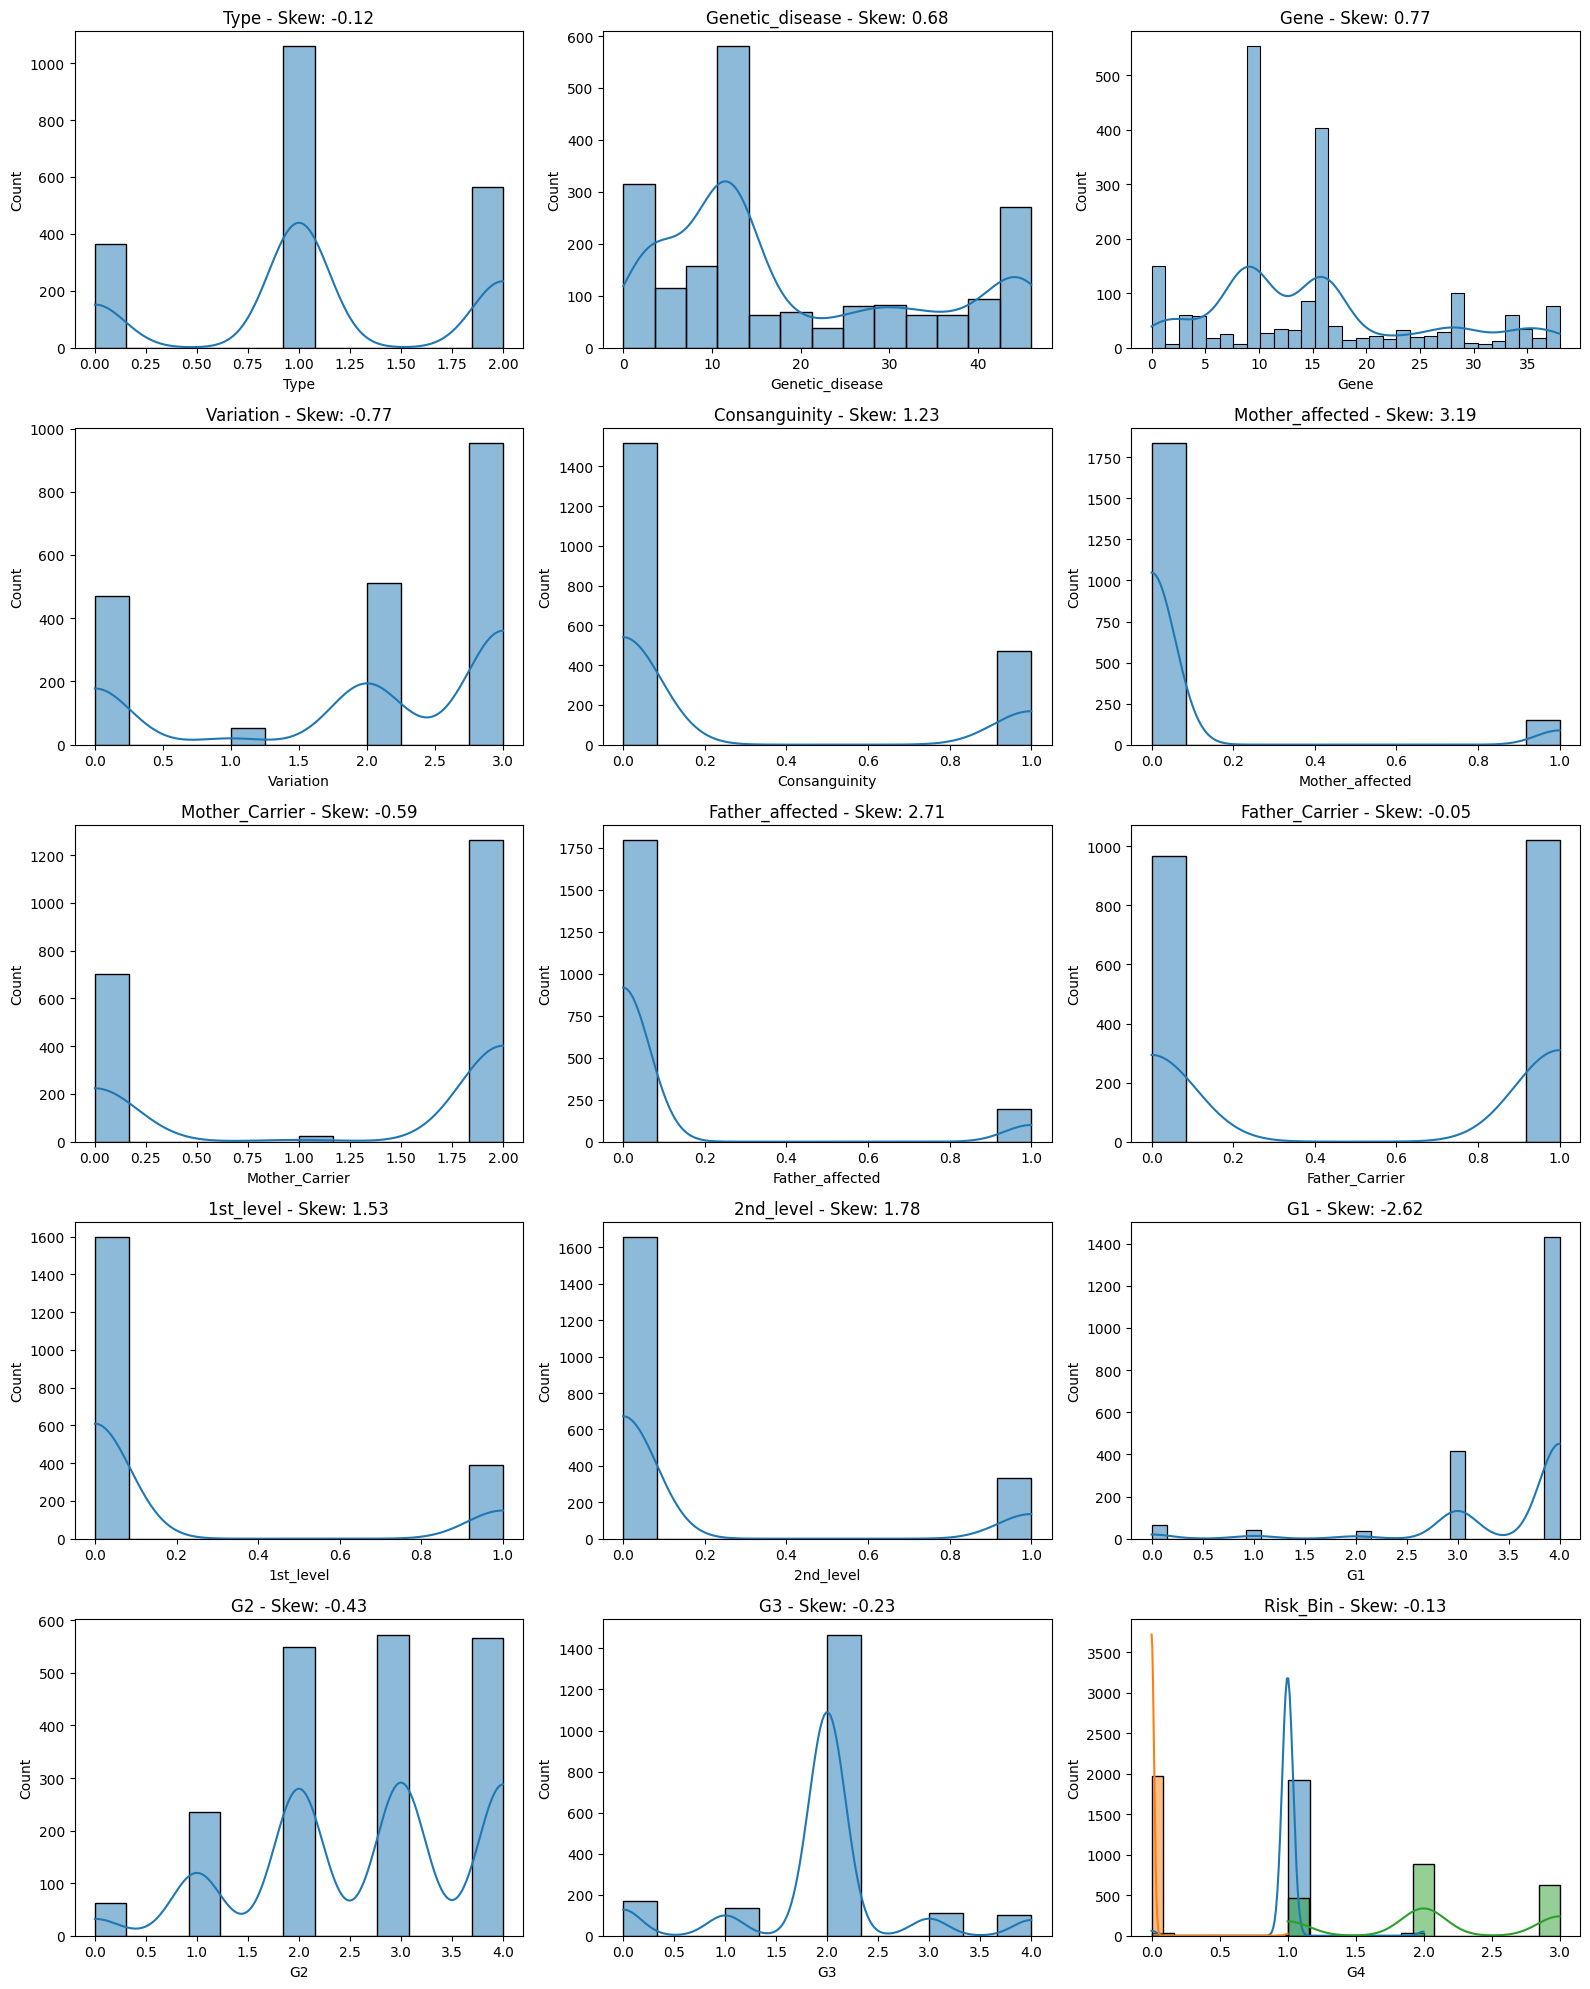

In [ ]:
numerical_cols = df2.select_dtypes(include=['number']).columns
plt.figure(figsize=(16, 20))
for i, col in enumerate(numerical_cols, start=1):
    plt.subplot(5, 3, i) if i <= 15 else None
    sns.histplot(df2[col], kde=True)
    plt.title(f"{col} - Skew: {df2[col].skew():.2f}")
plt.tight_layout()
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)


In [ ]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Type             1987 non-null   int64
 1   Genetic_disease  1987 non-null   int64
 2   Gene             1987 non-null   int64
 3   Variation        1987 non-null   int64
 4   Consanguinity    1987 non-null   int64
 5   Mother_affected  1987 non-null   int64
 6   Mother_Carrier   1987 non-null   int64
 7   Father_affected  1987 non-null   int64
 8   Father_Carrier   1987 non-null   int64
 9   1st_level        1987 non-null   int64
 10  2nd_level        1987 non-null   int64
 11  G1               1987 non-null   int64
 12  G2               1987 non-null   int64
 13  G3               1987 non-null   int64
 14  G4               1987 non-null   int64
 15  G5               1987 non-null   int64
dtypes: int64(16)
memory usage: 248.5 KB


In [ ]:
strat_kfold = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

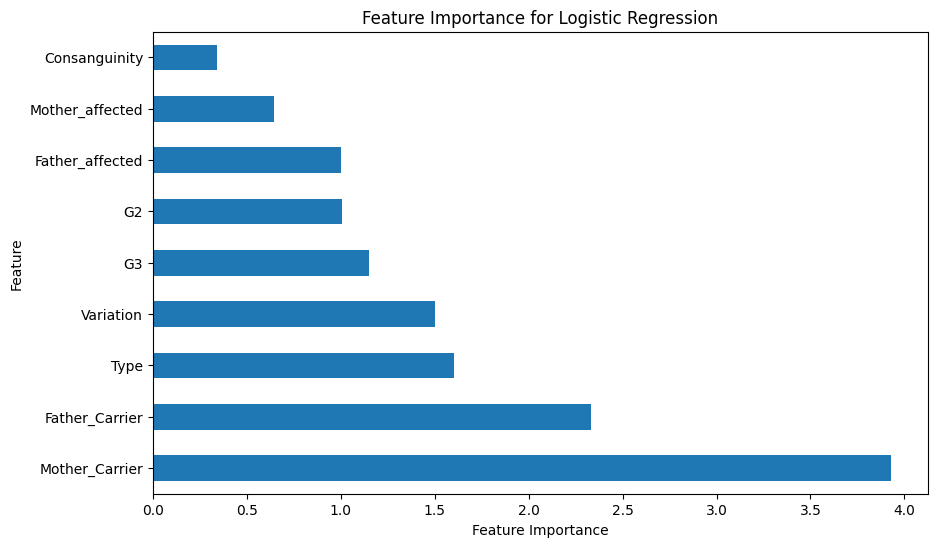

In [ ]:
logistic_classifier = LogisticRegression(max_iter=1000, random_state=42)
logistic_classifier.fit(X_train, y_train)

# Extract feature importances (coefficients)
feature_importances = pd.Series(abs(logistic_classifier.coef_[0]), index=X_train.columns)

# Select the top 10 features based on importance
top_features = feature_importances.nlargest(9)

# Visualize the top 10 feature importances
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title('Feature Importance for Logistic Regression')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

REGRESSOR MODELS

In [ ]:
lr_model = LinearRegression()

# Perform cross-validation using Stratified K-Fold
lr_mse_scores = cross_val_score(lr_model, X_train, y_train, scoring='neg_mean_squared_error', cv=strat_kfold)
lr_mae_scores = cross_val_score(lr_model, X_train, y_train, scoring='neg_mean_absolute_error', cv=strat_kfold)

# Convert the scores to positive values
lr_mse_scores = -lr_mse_scores
lr_mae_scores = -lr_mae_scores

# Fit the model on the full training data
lr_model.fit(X_train, y_train)

# Make predictions on the test set
lr_predictions = lr_model.predict(X_test)

# Calculate Mean Squared Error and Mean Absolute Error on the test set
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_mae = mean_absolute_error(y_test, lr_predictions)

# Print the cross-validation scores and test set evaluation metrics
print("Linear Regression Cross-Validation Mean Squared Error:", np.mean(lr_mse_scores))
print("Linear Regression Cross-Validation Mean Absolute Error:", np.mean(lr_mae_scores))
print("Linear Regression Mean Squared Error on Test Set:", lr_mse)
print("Linear Regression Mean Absolute Error on Test Set:", lr_mae)

Linear Regression Cross-Validation Mean Squared Error: 0.20152343813131932
Linear Regression Cross-Validation Mean Absolute Error: 0.3320451249919859
Linear Regression Mean Squared Error on Test Set: 0.1870973339503809
Linear Regression Mean Absolute Error on Test Set: 0.32002948695602274


In [ ]:
# Define the Logistic Regression model
logistic_model = LogisticRegression()

# Perform cross-validation using Stratified K-Fold
logistic_accuracy_scores = cross_val_score(logistic_model, X_train, y_train, scoring='accuracy', cv=strat_kfold)

# Fit the model on the full training data
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
logistic_predictions = logistic_model.predict(X_test)

# Calculate accuracy on the test set
logistic_accuracy = accuracy_score(y_test, logistic_predictions)

# Print the cross-validation scores and test set accuracy
print("Logistic Regression Cross-Validation Accuracy:", np.mean(logistic_accuracy_scores))
print("Logistic Regression Accuracy on Test Set:", logistic_accuracy)

# Print the classification report on the test set
print("Logistic Regression Classification Report:\n", classification_report(y_test, logistic_predictions))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Cross-Validation Accuracy: 0.9861548143486469
Logistic Regression Accuracy on Test Set: 0.9974874371859297
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           1       0.99      1.00      1.00       104
           2       1.00      1.00      1.00       177
           3       1.00      0.99      1.00       117

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:

# Evaluate the model using the custom evaluation function
evaluate_multilabel_model(logistic_predictions, y_test)

Hamming Loss: 0.002512562814070352
Label 1 - Precision: 0.9904761904761905, Recall: 1.0, F1 Score: 0.9952153110047847
Label 2 - Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Label 3 - Precision: 1.0, Recall: 0.9914529914529915, F1 Score: 0.9957081545064378

Micro F1 Score: 0.9974874371859297
Macro F1 Score: 0.9969744885037408
Weighted F1 Score: 0.9974880563360574


In [ ]:
xgb_model = XGBRegressor()

# Define the Stratified K-Fold with 5 splits

# Perform cross-validation using Stratified K-Fold
xgb_mse_scores = cross_val_score(xgb_model, X_train, y_train, scoring='neg_mean_squared_error', cv=strat_kfold)
xgb_mae_scores = cross_val_score(xgb_model, X_train, y_train, scoring='neg_mean_absolute_error', cv=strat_kfold)

# Convert the scores to positive values
xgb_mse_scores = -xgb_mse_scores
xgb_mae_scores = -xgb_mae_scores

# Fit the model on the full training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
xgb_predictions = xgb_model.predict(X_test)

# Calculate Mean Squared Error and Mean Absolute Error on the test set
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)

# Print the cross-validation scores and test set evaluation metrics
print("XGBoost Cross-Validation Mean Squared Error:", np.mean(xgb_mse_scores))
print("XGBoost Cross-Validation Mean Absolute Error:", np.mean(xgb_mae_scores))
print("XGBoost Mean Squared Error on Test Set:", xgb_mse)
print("XGBoost Mean Absolute Error on Test Set:", xgb_mae)

XGBoost Cross-Validation Mean Squared Error: 0.004833729448372741
XGBoost Cross-Validation Mean Absolute Error: 0.004146324792997577
XGBoost Mean Squared Error on Test Set: 0.0007886822917660734
XGBoost Mean Absolute Error on Test Set: 0.002143862708729116


CLASSIFIER MODELS WITH DATA AUGMENTED

In [ ]:
# Initialize classifiers
logistic_classifier = LogisticRegression()
rf_classifier = RandomForestClassifier()
nb_classifier = GaussianNB()
xgb_model = XGBClassifier()
svm_classifier = SVC()
gbm_classifier = GradientBoostingClassifier()

In [ ]:
# Initialize StratifiedKFold
kfold = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

In [ ]:
# Perform cross-validation
logistic_scores = cross_val_score(logistic_classifier, X2, y2, cv=kfold)
rf_scores = cross_val_score(rf_classifier, X2, y2, cv=kfold)
nb_scores = cross_val_score(nb_classifier, X2, y2, cv=kfold)
svm_scores = cross_val_score(svm_classifier, X2, y2, cv=kfold)
gbm_scores = cross_val_score(gbm_classifier, X2, y2, cv=kfold)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y2)
xgb_scores = cross_val_score(xgb_model, X2, y_train_encoded, cv=kfold)

In [ ]:
logistic_predicted_labels = cross_val_predict(logistic_classifier, X2, y2, cv=kfold)
rf_predicted_labels = cross_val_predict(rf_classifier, X2, y2, cv=kfold)
nb_predicted_labels = cross_val_predict(nb_classifier, X2, y2, cv=kfold)
xgb_predicted_labels = cross_val_predict(xgb_model, X2, y_train_encoded, cv=kfold)
svm_predicted_labels = cross_val_predict(svm_classifier, X2, y2, cv=kfold)
gbm_predicted_labels = cross_val_predict(gbm_classifier, X2, y2, cv=kfold)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
#save model as pickle file
import pickle
logistic_classifier.fit(X2, y2)
with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(logistic_classifier, f)

In [ ]:
print("Random Forest Cross-Validation Scores:", rf_scores)
print("Mean Random Forest Cross-Validation Score:", rf_scores.mean())
print("Random Forest Classification Report:")
print(classification_report(y2, rf_predicted_labels))

Random Forest Cross-Validation Scores: [1.         1.         1.         0.99295775 1.         1.
 1.        ]
Mean Random Forest Cross-Validation Score: 0.9989939637826961
Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.99      1.00      1.00       468
           2       1.00      1.00      1.00       888
           3       1.00      1.00      1.00       631

    accuracy                           1.00      1987
   macro avg       1.00      1.00      1.00      1987
weighted avg       1.00      1.00      1.00      1987



In [ ]:
print("Gradient Boosting Cross-Validation Scores:", gbm_scores)
print("Mean Gradient Boosting Cross-Validation Score:", gbm_scores.mean())
print("Gradient Boosting Classification Report:")
print(classification_report(y2, gbm_predicted_labels))

Gradient Boosting Cross-Validation Scores: [1.         1.         1.         0.99295775 1.         0.99647887
 1.        ]
Mean Gradient Boosting Cross-Validation Score: 0.9984909456740443
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           1       0.99      1.00      1.00       468
           2       1.00      1.00      1.00       888
           3       1.00      1.00      1.00       631

    accuracy                           1.00      1987
   macro avg       1.00      1.00      1.00      1987
weighted avg       1.00      1.00      1.00      1987



XGBoost Cross-Validation Scores: [0.99647887 1.         1.         0.99295775 1.         0.99647887
 1.        ]
Mean XGBoost Cross-Validation Score: 0.9979879275653925
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       468
           1       1.00      1.00      1.00       888
           2       1.00      1.00      1.00       631

    accuracy                           1.00      1987
   macro avg       1.00      1.00      1.00      1987
weighted avg       1.00      1.00      1.00      1987



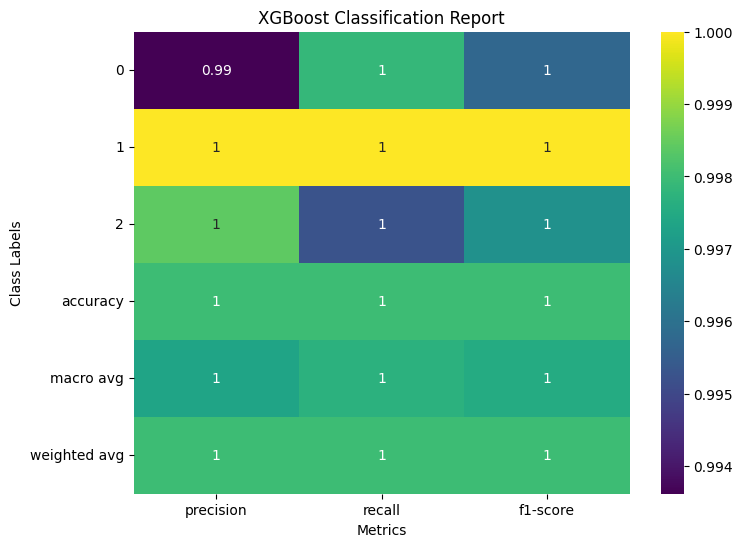

In [ ]:

print("XGBoost Cross-Validation Scores:", xgb_scores)
print("Mean XGBoost Cross-Validation Score:", xgb_scores.mean())
print("XGBoost Classification Report:")
print(classification_report(y_train_encoded, xgb_predicted_labels))

# Plotting Classification Report as Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(classification_report(y_train_encoded, xgb_predicted_labels, output_dict=True)).iloc[:-1, :].T, annot=True, cmap='viridis')
plt.title('XGBoost Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Class Labels')
plt.show()

Logistic Regression Cross-Validation Scores: [0.98943662 0.98943662 0.99295775 0.98591549 0.99647887 0.98239437
 0.98939929]
Mean Logistic Regression Cross-Validation Score: 0.9894312873708683
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.99      0.98       468
           2       1.00      0.99      1.00       888
           3       0.99      0.98      0.98       631

    accuracy                           0.99      1987
   macro avg       0.99      0.99      0.99      1987
weighted avg       0.99      0.99      0.99      1987



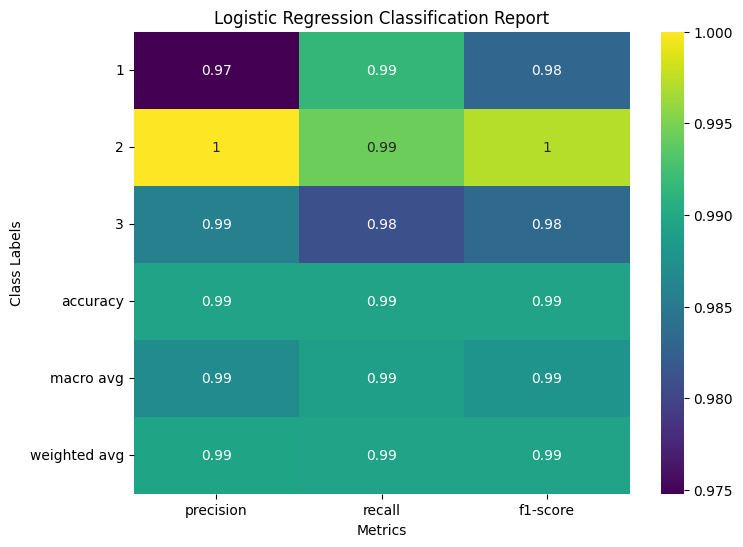

In [ ]:
# Evaluate performance
print("Logistic Regression Cross-Validation Scores:", logistic_scores)
print("Mean Logistic Regression Cross-Validation Score:", logistic_scores.mean())
print("Logistic Regression Classification Report:")
print(classification_report(y2, logistic_predicted_labels))

# Plotting Classification Report as Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(classification_report(y2, logistic_predicted_labels, output_dict=True)).iloc[:-1, :].T, annot=True, cmap='viridis')
plt.title('Logistic Regression Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Class Labels')
plt.show()

Naive Bayes Cross-Validation Scores: [0.97535211 0.95422535 0.97535211 0.95422535 0.96830986 0.95070423
 0.97526502]
Mean Naive Bayes Cross-Validation Score: 0.9647762902503361
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           1       0.90      0.99      0.94       468
           2       1.00      0.98      0.99       888
           3       0.97      0.92      0.95       631

    accuracy                           0.96      1987
   macro avg       0.96      0.96      0.96      1987
weighted avg       0.97      0.96      0.97      1987



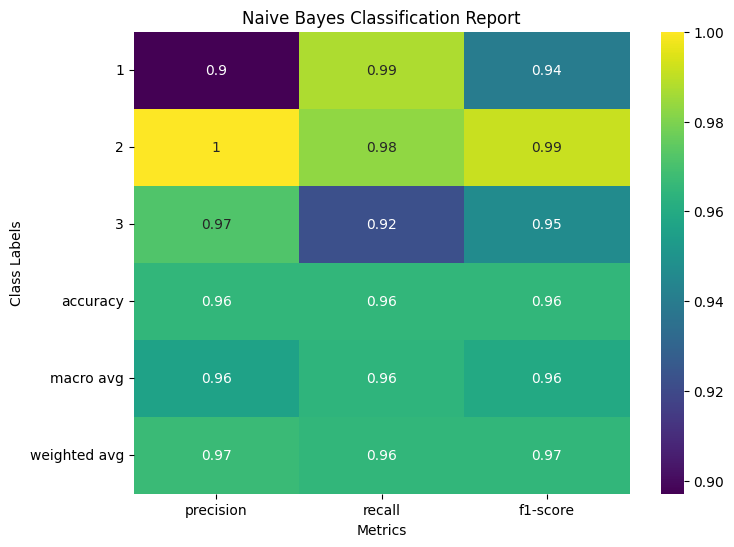

In [ ]:

print("Naive Bayes Cross-Validation Scores:", nb_scores)
print("Mean Naive Bayes Cross-Validation Score:", nb_scores.mean())
print("Naive Bayes Classification Report:")
print(classification_report(y2, nb_predicted_labels))

# Plotting Classification Report as Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(classification_report(y2, nb_predicted_labels, output_dict=True)).iloc[:-1, :].T, annot=True, cmap='viridis')
plt.title('Naive Bayes Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Class Labels')
plt.show()

SVM Cross-Validation Scores: [0.95774648 0.94014085 0.9471831  0.95774648 0.95422535 0.92605634
 0.91872792]
Mean SVM Cross-Validation Score: 0.9431180723919488
SVM Classification Report:
              precision    recall  f1-score   support

           1       0.92      1.00      0.96       468
           2       0.95      0.96      0.96       888
           3       0.94      0.88      0.91       631

    accuracy                           0.94      1987
   macro avg       0.94      0.95      0.94      1987
weighted avg       0.94      0.94      0.94      1987



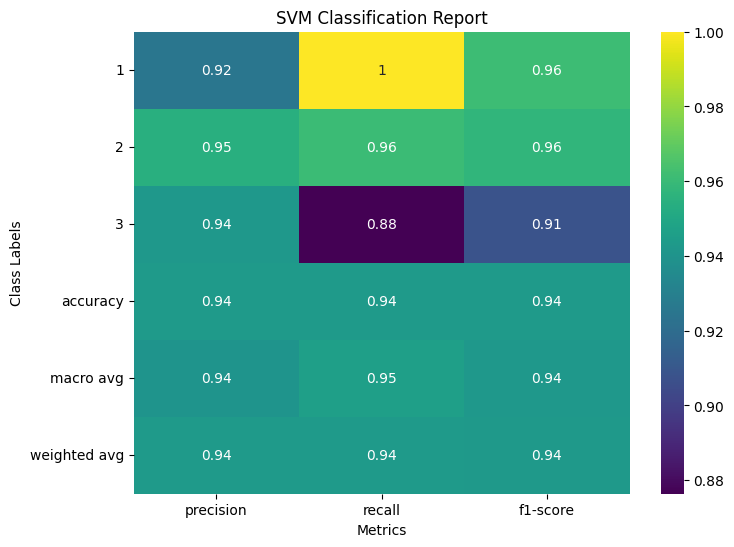

In [ ]:
print("SVM Cross-Validation Scores:", svm_scores)
print("Mean SVM Cross-Validation Score:", svm_scores.mean())
print("SVM Classification Report:")
print(classification_report(y2, svm_predicted_labels))

# Plotting Classification Report as Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(classification_report(y2, svm_predicted_labels, output_dict=True)).iloc[:-1, :].T, annot=True, cmap='viridis')
plt.title('SVM Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Class Labels')
plt.show()

In [ ]:
print("Mean XGBoost Cross-Validation Score:", xgb_scores.mean())
print("Mean Gradient Boosting Cross-Validation Score:", gbm_scores.mean())
print("Mean Random Forest Cross-Validation Score:", rf_scores.mean())
print("Mean Logistic Regression Cross-Validation Score:", logistic_scores.mean())
print("Mean Naive Bayes Cross-Validation Score:", nb_scores.mean())
print("Mean SVM Cross-Validation Score:", svm_scores.mean())


Mean XGBoost Cross-Validation Score: 0.9979879275653925
Mean Gradient Boosting Cross-Validation Score: 0.9984909456740443
Mean Random Forest Cross-Validation Score: 0.9989939637826961
Mean Logistic Regression Cross-Validation Score: 0.9894312873708683
Mean Naive Bayes Cross-Validation Score: 0.9647762902503361
Mean SVM Cross-Validation Score: 0.9431180723919488


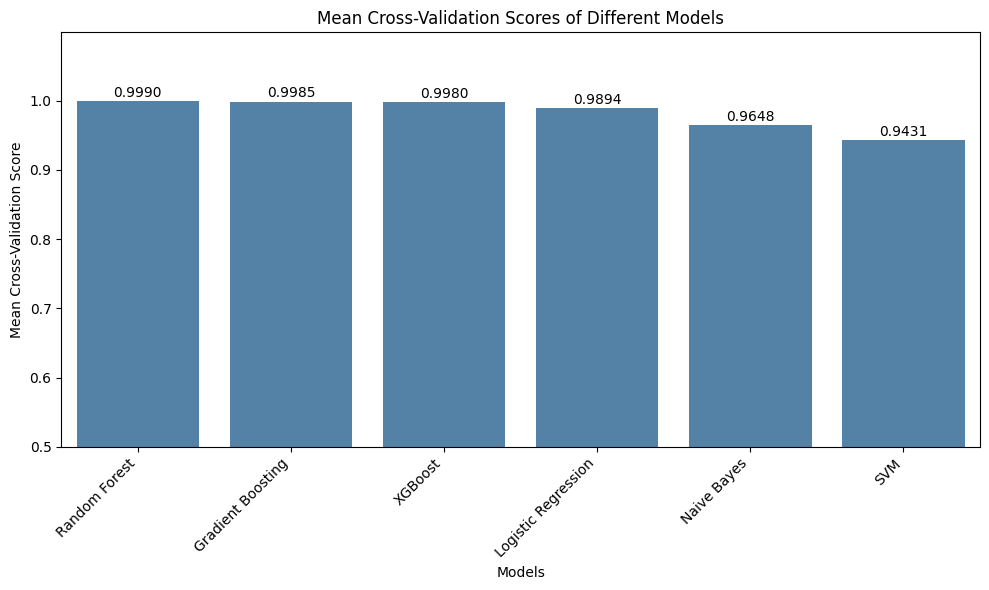

In [ ]:
# Define the model names and their mean cross-validation scores
models = ['Random Forest', 'Gradient Boosting', 'XGBoost',  'Logistic Regression', 'Naive Bayes', 'SVM']
mean_scores = [ rf_scores.mean(),gbm_scores.mean(), xgb_scores.mean(), logistic_scores.mean(), nb_scores.mean(), svm_scores.mean()]

# Create a Seaborn bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=mean_scores, color='steelblue')
plt.title('Mean Cross-Validation Scores of Different Models')
plt.xlabel('Models')
plt.ylabel('Mean Cross-Validation Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add data labels to the bars with an offset from the top border
for i, score in enumerate(mean_scores):
    plt.text(i, score + 0.002, f'{score:.4f}', ha='center', va='bottom', fontsize=10)

plt.ylim(0.5, max(mean_scores) * 1.1)  # Set the y-axis scale to accommodate the data
plt.tight_layout()

# Save the plot as an image or display it
plt.savefig('model_comparison_plot.png')  # Save as an image file
plt.show()  # Display the plot

In [ ]:
# Create a Gaussian Naive Bayes classifier
gnb_classifier = GaussianNB()
# Perform cross-validation using Gaussian Naive Bayes
gnb_scores = cross_val_score(gnb_classifier, X2, y2, cv=kfold)
gnb_predictions = cross_val_predict(gnb_classifier, X2, y2, cv=kfold)

Mean Gaussian Naive Bayes Cross-Validation Score: 0.9647762902503361
Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

           1       0.90      0.99      0.94       468
           2       1.00      0.98      0.99       888
           3       0.97      0.92      0.95       631

    accuracy                           0.96      1987
   macro avg       0.96      0.96      0.96      1987
weighted avg       0.97      0.96      0.97      1987



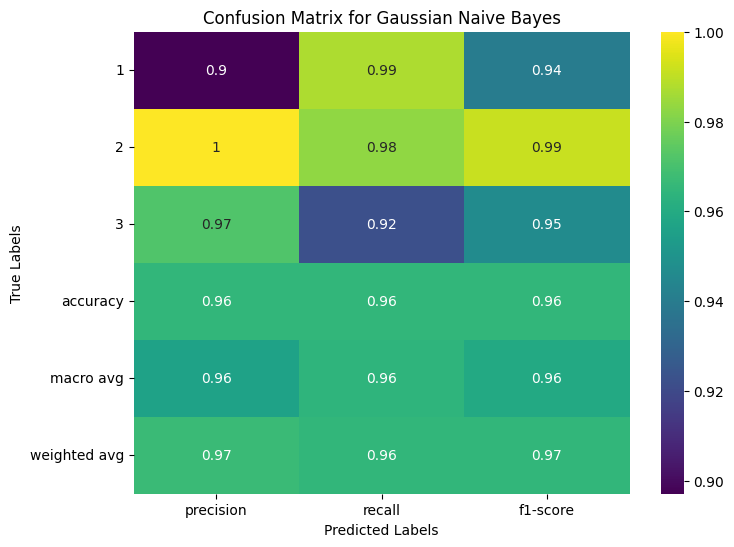

In [ ]:
# Print the mean cross-validation score
print("Mean Gaussian Naive Bayes Cross-Validation Score:", np.mean(gnb_scores))
# Print the classification report
print("Gaussian Naive Bayes Classification Report:")
print(classification_report(y2, gnb_predictions))

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(classification_report(y2, gnb_predictions, output_dict=True)).iloc[:-1, :].T, annot=True, cmap='viridis')
plt.title('Confusion Matrix for Gaussian Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()